<a href="https://colab.research.google.com/github/iamwendellbalagot/google-colab/blob/master/ANOVA_CHISQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import statsmodels.api as sm
from statsmodels.formula.api import ols

plt.style.use('ggplot')
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('ToothGrowth.csv')
df.head()

,Unnamed: 0,len,supp,dose
0,1,4.2,VC,0.5
1,2,11.5,VC,0.5
2,3,7.3,VC,0.5
3,4,5.8,VC,0.5
4,5,6.4,VC,0.5


In [9]:
model = ols('len ~ C(supp) + C(dose) + C(supp):C(dose)', df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(supp),205.350000,1.0,15.571979,2.311828e-04
C(dose),2426.434333,2.0,91.999965,4.046291e-18
C(supp):C(dose),108.319000,2.0,4.106991,2.186027e-02
Residual,712.106000,54.0,NaN,NaN


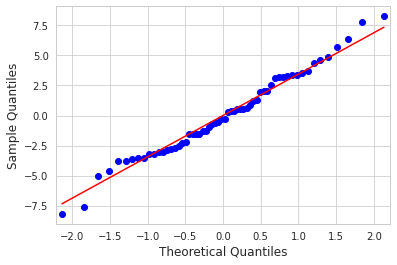

In [13]:
res = model.resid
sm.qqplot(res, line='s');

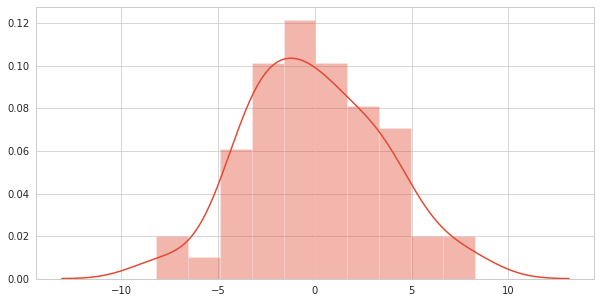

In [17]:
plt.figure(figsize=(10,5))
sns.distplot(res, bins=10);

In [18]:
con_t = [[207, 282, 241], [234, 242, 232]]
sc.stats.chi2_contingency(con_t)

(4.542228269825232,
 0.1031971404730939,
 2,
 array([[223.87343533, 266.00834492, 240.11821975],
        [217.12656467, 257.99165508, 232.88178025]]))

In [19]:
stats, p, df, expected = sc.stats.chi2_contingency(con_t)
print('P-value: {}'.format(p))

P-value: 0.1031971404730939


In [22]:
sc.stats.chi2_contingency([[14],[71],[7],[65],[23],[19],[12],[45],[53],[6]])

(0.0, 1.0, 0, array([[14.],
        [71.],
        [ 7.],
        [65.],
        [23.],
        [19.],
        [12.],
        [45.],
        [53.],
        [ 6.]]))

In [21]:
sc.stats.chi2_contingency(np.array([14,71,7,65,23,19,12,45,53,6]))

(0.0, 1.0, 0, array([14., 71.,  7., 65., 23., 19., 12., 45., 53.,  6.]))